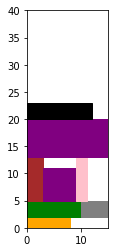

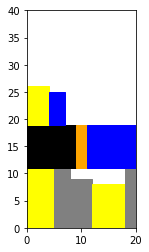

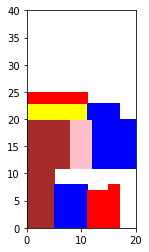

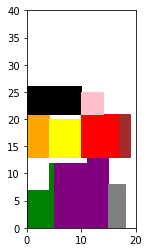

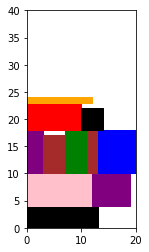

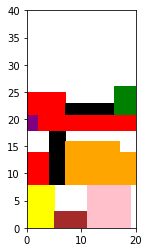

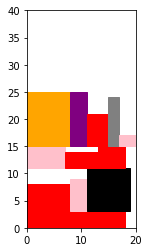

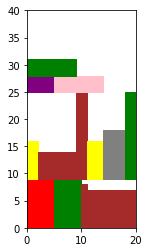

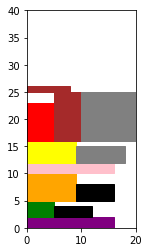

In [12]:
import pathlib
import numpy as np,random
from pylatex import Document, Section, Subsection,Itemize
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
#---------------- UTILIDADES ---------------

                          
def getRectangulo(rectangulos,solucion,indice):
    r = (0,0)
    if(solucion[1][indice] == 0):
        r = rectangulos[solucion[0][indice]]
    else:
        r = obtener_rotado(rectangulos[solucion[0][indice]])
    return r
def render(grafico,pos,ancho,largo):    
    colors=['green','red', 'blue','yellow','orange','purple','brown','black','grey','pink']
    patch = patches.Rectangle(pos, ancho, largo, color =random.choice(colors))
    grafico.add_patch(patch) # Dibujar 
    
def dibujacion(rectangulos,solucion,W):
    # giladas de la libreria 
    fig1 = plt.figure()
    grafico = fig1.add_subplot(111, aspect='equal') 
    # armando grafico    # solucion = [(4, 15), (15, 3), (6, 6), (3, 12), (4, 6), (2, 8), (8, 2), (3, 5), (10, 3)]
    anchoAcumulado = 0
    altoAcumulado = 0
    nivel = 0
    x = 0
    for i in range(len(solucion[0])):
        r = getRectangulo(rectangulos,solucion,i)
        ancho=r.width
        alto=r.height
        anchoAcumulado = anchoAcumulado + ancho 
        if(W < anchoAcumulado):
            nivel = nivel + altoAcumulado
            anchoAcumulado = ancho
            x = 0
            altoAcumulado = 0
        render(grafico,(x, nivel),ancho,alto) 
        if(altoAcumulado < alto):
            altoAcumulado = alto
        x = x + ancho
    plt.ylim((0, 40)) # Limite grafico
    plt.xlim((0, W))
#dibujacion()
#    solucion = [(4, 15), (15, 3), (6, 6), (3, 12), (4, 6), (2, 8), (8, 2), (3, 5), (10, 3)]

'''
  #Exporta los datos estadisticos a un archivo .tex
  #Documentation : https://jeltef.github.io/PyLaTeX/latest/index.html
   #Parametros: 
      # Estadisticas [[problema, instancia, rotado, media, mediana, desviacion],[...]]
                        str,    str,    bool,   float,  float,    float
'''
def estadisticasToLatex(Estadisticas):  
    doc = Document()
    # creating a .tex with title "Estadisticas"
    with doc.create(Section('Estadisticas')):
        doc.append('En esta seccion mostraremos algunos resultados obtenidos de las multiples ejecuciones de diferentes instancias del problema.')
        doc.append('También, posteriormente un analisis, comparación y evaluación de estos resultados')
        for stats in Estadisticas:
            dibujacion(stats[0],stats[6],stats[7]) # problema, solucion (rectangulos, posicion)
            if(not stats[2]):
                subtitulo = 'Resultados instancia: '
                subtitulo = subtitulo + stats[1]
                with doc.create(Subsection(subtitulo)):
                    problem = 'Problema : W='+str(stats[7])
                    problem = problem + str(stats[0]) + ' \n'
                    doc.append(problem)
                    doc.append((' Algoritmo sin Rotación : '))
                    with doc.create(Itemize()) as itemize:  
                        prom = 'Promedio : '
                        prom = prom + str(stats[3])
                        itemize.add_item(prom)
                        med='Mediana : '
                        med = med + str(stats[4])
                        itemize.add_item(med)
                        desve='Desviación estandar : '
                        desve = desve + str(stats[5])
                        itemize.add_item(desve)  
            else:
                doc.append(('Algoritmo con Rotación : '))
                with doc.create(Itemize()) as itemize:  
                    prom = 'Promedio : '
                    prom = prom + str(stats[3])
                    itemize.add_item(prom)
                    med='Mediana : '
                    med = med + str(stats[4])
                    itemize.add_item(med)
                    desve='Desviación estandar : '
                    desve = desve + str(stats[5])
                    itemize.add_item(desve)  
        # making a pdf using .generate "_pdf" "_tex"   -> doc.dumps_as_content()<- Para imprimir texto plano latex.
    doc.generate_tex('Estadisticas') 

# -------------- FIN UTILIDADES --------------
# --------------- GA - SPP -------------------
#LEER FROM ARCHIVO
PSIZE=30

W=100 #Ancho
PC=0.65 #Probabilidad de mutacion
PM=0.1 #Probabilidad de mutacion
MAXG=1000

class Rectangulo(object):
    def __init__(self,width,height):
        self.width=width
        self.height=height

    def __len__(self):
        return 2

    def __getitem__(self, i):
        if i==0:
            return self.width
        elif i==1:
            return self.height

    def __repr__(self):
        return str((self.width,self.height))
    

def obtener_rotado(rect):
  return Rectangulo(rect.height,rect.width)
'''
#Function
def menu():
    print("Bienvenido al solucionador del problema SPP (Strip Packing Problem)")
    instancia =str(input("Por favor seleccione la Instancia que desea resolver."))
    file = open(instancia)
    rectangulos = initProblem(file)
    rotar =int(input("¿Desea correr el algoritmo con la posibilidad de rotar los Rectangulos?\n 0- No. \n1- Si."))
    if(rotar):
        best_scores_progress, mejor_solucion, mejor_puntaje = ejecucion(cant,rectangles,True)
    else:
        best_scores_progress, mejor_solucion, mejor_puntaje = ejecucion(cant,rectangles,False)
'''
#Genera n rectangulos con ancho entre [10,50] y alto entre [10,75] (Rectangulos del Problema)
def init_problem(file):
    global W
    rectangulos=[]
    W = int(file.readline())
    rec = file.readline()
    while(rec != ""):
        corte = rec.split(" ")
        rectangulos.append(Rectangulo(int(corte[0]),int(corte[1])))
        rec = file.readline()
    return rectangulos

#Obtiene cant de rectangulos y el tamaño maximo de la poblacion de soluciones
#Mezcla el orden de los rectangulos de forma aleatoria para cada solucion de la poblacion
#Lo retorna como poblacion inicial
def init_population(pop_size,individuals,rotacion):
    list=np.arange(individuals)
    if(rotacion):
      pop=np.array([(np.random.permutation(list).tolist(),                       # permutamos los indv
                     [random.choice([True, False]) for j in range(individuals)]) # por cada rectangulo 0,0,1,0,1 ...
                       for i in range(pop_size)])                                # por cada solucion en la poblacion
    else:
      pop=np.array([(np.random.permutation(list).tolist(),[False for 
                                                 j in range(individuals)]) for i in range(pop_size)])
    return pop

def calculate_fitness(population,rectangles):
    #Ancho maximo de la tira
    global W
    #Parametrizacion de la poblacion a un vector
    shape=np.shape(population)
    pop_size=shape[0]
    ind=shape[2]
    scores=[]#fitness de cada poblacion
    #Recorre todas las soluciones de la poblacion
    for i in range(pop_size):
        ancho_nivel=0
        alto_max=0
        niveles=[]#cantidad de niveles, guardo altura de cada nivel
        #Recorre el orden de los rectangulos de las soluciones
        for j in range(ind):
            #Obtiene ancho y largo del rectangulo
            indx=population[i,0][j] #obtener rectengulo de mi individuo
            if population[i,1][j]:
              r_i=obtener_rotado(rectangles[indx])
            else:
              r_i=rectangles[indx]
            ancho_r=r_i.width
            alto_r=r_i.height
            w=ancho_r+ancho_nivel
            #Si al agregar el rectangulo no nos pasamos del ancho
            #Se agrega el rectangulo al nivel actual de la sol y se actualiza el alto de ser necesario
            #Caso contrario se realiza el corte guillotina guardando el nivel en la solucion
            #Y se inserta el rectangulo al siguiente nivel
            if w<=W:
                ancho_nivel=w
                if alto_r>alto_max:
                    alto_max=alto_r
            else:
                niveles.append(alto_max)
                ancho_nivel=ancho_r
                alto_max=alto_r
        niveles.append(alto_max)
        #Puntaje es la suma del largo de niveles, menor mejor
        scores.append(np.sum(niveles))
    return scores

#Dada una poblacion de soluciones y sus respectivos fitness
#Se elijen dos individuos aleatorios
#Se retornan los genes del ganador
def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    while(fighter_1==fighter_2):
        fighter_2=random.randint(0,population_size-1)
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    # Return the chromsome of the winner
    return population[winner, :]

def PMX(parent_1, parent_2,rotacion):
    # Get length of chromosome
    chromosome_length = len(parent_1[0])
    p_1=np.asarray(parent_1)
    p_2=np.asarray(parent_2)

    # Pick points, avoding ends of chromsome 
    point_1 = random.randint(1,chromosome_length-2)#-2 para que no haya problemas con el max
    point_2 = random.randint(point_1+1,chromosome_length-1)#Al menos 2
    b=np.arange(point_1,point_2+1) #Intervalo b para intercambio de genes

    child_1=np.array(parent_1)
    child_1[0][b]=p_2[0][b]
    child_1[1][b]=p_2[1][b]
    child_2=np.array(parent_2)
    child_2[0][b]=p_1[0][b]
    child_2[1][b]=p_1[1][b]
    
    corregir_faltantes(child_1,p_2,p_1,b,rotacion)
    corregir_faltantes(child_2,p_1,p_2,b,rotacion)
    return child_1, child_2

def corregir_faltantes(child,p_1,p_2,b,rotacion):
  chromosome_length = len(p_1[0])
  faltantes=[i for i in range(chromosome_length) if i not in child[0]]
  if faltantes:
    indices=[i for i in range(chromosome_length) if p_2[0][i] in p_1[0][b] and i not in b]
    child[0][indices]=np.random.choice(faltantes,len(indices),replace=False)
    child[1][indices] = False
    if rotacion:
      child[1][indices]=random.choice([True, False])

def swap_mutation(ind_1,ind_2,rotacion):
    global PM
    chr_len=len(ind_1[0])

    i_1=random.randint(0,chr_len-1)
    i_2=random.randint(0,chr_len-1)
    while(i_2==i_1):
        i_2=random.randint(0,chr_len-1)

    swap(ind_1[0][i_1],ind_1[0][i_2])
    swap(ind_2[0][i_1],ind_2[0][i_2])

    if rotacion:
      swap(ind_1[1][i_1],ind_1[1][i_2])
      swap(ind_2[1][i_1],ind_2[1][i_2])

      i_1=random.randint(0,chr_len-1)
      i_2=random.randint(0,chr_len-1)
      while(i_2==i_1):
          i_2=random.randint(0,chr_len-1)

      swap(ind_1[1][i_1],ind_1[1][i_2])
      swap(ind_2[1][i_1],ind_2[1][i_2])
    return ind_1,ind_2

def swap(a,b):
  aux = a
  a=b
  b=aux
def ejecucion_ga(pop,rectangles,rotacion,scores,best_score,best_scores_progress):
  mejor_puntaje = float('inf')
  mejor_solucion = []
  for generation in range(MAXG):
        new_population=[]
        if best_score < mejor_puntaje:
          mejor_puntaje = best_score
          mejor_solucion = pop[np.argmin(scores)][:]
        for i in range(int(PSIZE/2)):
            parent_1 = select_individual_by_tournament(pop, scores)
            parent_2 = select_individual_by_tournament(pop, scores)
            #Evolucion
            if np.random.random()<PC:
                child_1, child_2 = PMX(parent_1, parent_2,rotacion)
            else:
                child_1=parent_1
                child_2=parent_2
            #Mutacion
            if np.random.random()<PM:
                swap_mutation(child_1,child_2,rotacion)
            new_population.append(child_1)
            new_population.append(child_2)
        pop=np.array(new_population)
        scores=calculate_fitness(pop,rectangles)
        best_score=np.min(scores)
        best_scores_progress.append(best_score)
  return mejor_puntaje, mejor_solucion

def ejecucion(cant,rectangles,rotacion):
    pop=init_population(PSIZE,cant,rotacion)
    scores=calculate_fitness(pop,rectangles)
    best_scores_progress=[]
    best_score=np.min(scores)
    best_scores_progress.append(best_score)
    mejor_puntaje, mejor_solucion = ejecucion_ga(pop,rectangles,rotacion,scores,best_score,best_scores_progress)
    return best_scores_progress,mejor_solucion,mejor_puntaje

def ga_spp(seed,file):
    global PSIZE,PC,W
    random.seed(seed)
    np.random.seed(seed)
    rectangles=init_problem(open(file))
    #Sin Rotacion
    best_scores_progress, mejor_solucion, mejor_puntaje = ejecucion(len(rectangles),rectangles,False) #cant
    #Con Rotacion
    best_scores_progress_rotacion, mejor_solucion_rotacion, mejor_puntaje_rotacion=ejecucion(len(rectangles),rectangles,True)
    return rectangles, [mejor_puntaje,mejor_solucion],[mejor_puntaje_rotacion,mejor_solucion_rotacion]

#Instancia del problema con con 10 rectangulos
repeticiones = 20
diferencia_puntaje=0
instancias = ["spp9a.txt","spp9b.txt","spp10.txt","spp11.txt","spp12.txt","spp13.txt"] 
estadisticas = []
sin_prints = True
for i in instancias:
    progreso_mejores = []
    progreso_mejores_rotacion = []
    mejores_rotacion=[]
    mejor_actual = float('inf')
    mejor_actual_rotacion = float('inf')
    for j in range(repeticiones):
        problema, resultados, resultados_rotacion = ga_spp(j,i) #    return rectangles, [mejor_puntaje,mejor_solucion],[mejor_puntaje_rotacion,mejor_solucion_rotacion]
        if(float(resultados[0]) < mejor_actual):
            mejor_actual = resultados[0]
            mejor_sol = resultados[1]
        #print(resultados[1])#ACAME TRAE LA MEJOR SOLUCION QUE QUIERO 
        progreso_mejores.append(resultados[0])
        if(float(resultados[0]) < mejor_actual_rotacion):
            mejor_actual_rotacion = resultados_rotacion[0]
            mejor_sol_rotacion = resultados_rotacion[1]
        progreso_mejores_rotacion.append(resultados_rotacion[0])
    #Sin Rotacion
    media = np.average(progreso_mejores)
    mediana = np.median(progreso_mejores)
    desviacion = np.std(progreso_mejores)
    estadisticas.append([problema,i,False,media,mediana,desviacion,mejor_sol, W])
    #Con Rotacion
    media_rotacion = np.average(progreso_mejores_rotacion)
    mediana_rotacion = np.median(progreso_mejores_rotacion)
    desviacion_rotacion = np.std(progreso_mejores_rotacion)
    estadisticas.append([problema,i,True,media_rotacion,mediana_rotacion,desviacion_rotacion,mejor_sol_rotacion,W])
estadisticasToLatex(estadisticas)
